<IPython.core.display.Javascript object>


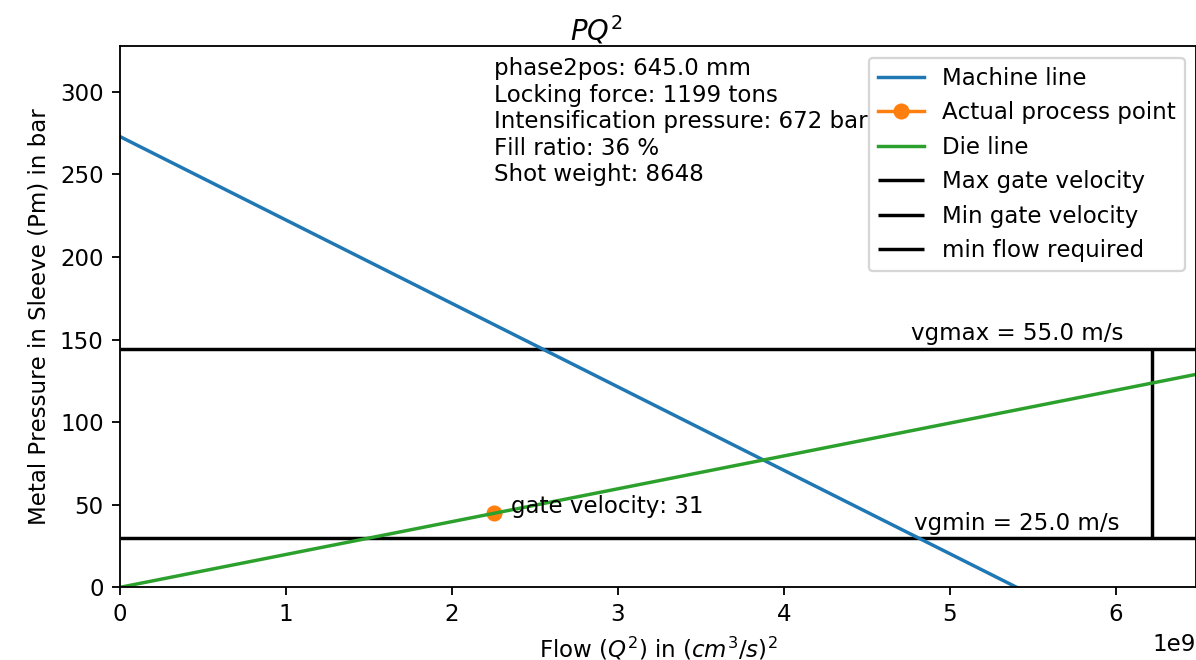

interactive(children=(FloatSlider(value=120.0, description='$N_2$ Pressure (bar)', layout=Layout(margin='0 0 0…

<function __main__.calc_1(phs, Dint, Dinj, Dpl, Ag, vpl, vdry, Ti, Tf, Td, S, tw, dl, Cd, tb, vgmax, vgmin, Wp, Wof, Wrun, Aproj, Ls, Tliq, Tsol, gt)>

In [4]:
# nbi:hide_in
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import *
%matplotlib nbagg

fig,ax= plt.subplots(1,figsize=(7.25,4))

layout={'width':'350px','margin':'0 0 0 0','padding':'0 0 0 0'}
style={'description_width':'150px'}
phs=FloatSlider(min=0,max=200,value=120,description='$N_2$ Pressure (bar)',layout=layout,style=style)
Dint=FloatSlider(min=0,max=500,value=284,description='${\phi}$ Intensification cyl.(mm)',layout=layout,style=style)
Dinj=FloatSlider(min=0,max=300,value=181,description='${\phi}$ Injection cyl(mm)',layout=layout,style=style)
Dpl=FloatSlider(min=0,max=200,value=120,description='${\phi}$ Piston (mm)',layout=layout,style=style)
Ag=FloatSlider(min=0,max=50,value=15.5,description='Gate area (cm$^2$)',layout=layout,style=style)
vpl=FloatSlider(min=0,max=10,value=4.2,description='Plunger speed (m/s)',layout=layout,style=style)
Ti=FloatSlider(min=500,max=800,value=630,description='Metal temp at gate ${^\circ}$C',layout=layout,style=style)
Tf=FloatSlider(min=500,max=800,value=570,description='Min metal temp to flow ${^\circ}$C',layout=layout,style=style)
Td=FloatSlider(min=50,max=400,value=180,description='Die temp ${^\circ}$C',layout=layout,style=style)
S=FloatSlider(min=0,max=100,value=20,description='Fraction solid (%)',layout=layout,style=style)
tw=FloatSlider(min=0,max=10,value=4,description='Avg wall thickness (mm)',layout=layout,style=style)
dl=FloatSlider(min=0,max=3,value=2.39,description='density of Al (g/cm$^3$)',layout=layout,style=style)
Cd=FloatSlider(min=0,max=1,value=0.5,description='Co-effecient of discharge',layout=layout,style=style)
vgmax=FloatSlider(min=0,max=100,value=55,description='Max gate velocity (m/s)',layout=layout,style=style)
vgmin=FloatSlider(min=0,max=100,value=25,description='Min gate velocity (m/s)',layout=layout,style=style)
Wp=FloatSlider(min=0,max=30000,value=5040,description='Part weight (gms)',layout=layout,style=style)
Wof=FloatSlider(min=0,max=10000,value=688,description='Overflow weight (gms)',layout=layout,style=style)
Wrun=FloatSlider(min=0,max=20000,value=2920,description='Runner weight (gms)',layout=layout,style=style)
Aproj=FloatSlider(min=0,max=5000,value=1750,description='Projected area (cm$^2$)',layout=layout,style=style)
Ls=FloatSlider(min=0,max=200,value=89.2,description='Sleeve length (cm)',layout=layout,style=style)
vdry=FloatSlider(min=0,max=10,value=6.5,description='Dry plunger speed (m/s)',layout=layout,style=style)
tb=FloatSlider(min=0,max=10,value=3.5,description='Biscuit thickness (mm)',layout=layout,style=style)
Tliq=IntSlider(min=550,max=600,value=582,description='Liquidus temp in $^{\circ}$C',
              layout=layout,style=style)
Tsol=IntSlider(min=500,max=550,value=516,description='Solidus temperature in $^{\circ}$C',
              layout=layout,style=style)
gt=Text(description='Part name',layout=layout,style=style)

def calc_1(phs,Dint,Dinj,Dpl,Ag,vpl,vdry,Ti,Tf,Td,S,tw,dl,Cd,tb,
           vgmax,vgmin,Wp,Wof,Wrun,Aproj,Ls,Tliq,Tsol,gt):
    Z=3.8
    g=9.81
    cp=962.5 # specific heat in J/kg deg K
    Lf=388442 # Latent heat of fusion in J/kg
    k=96.1 # Thermal conductivity in J/s m degK
    hsurf=65000 #Convective heat transfer coeffecient in W/m^2 degK
    if Ti>Tliq:
        Te=Tliq # Solidification analysis start temperature
    else :
        Te=Ti
    Aint=np.pi*(Dint/10)**2/4
    Ainj=np.pi*(Dinj/10)**2/4
    Finj=phs*Ainj*10/1000
    Apl=np.pi*(Dpl/10)**2/4
    Pm=Finj/Apl*1000/10
    Vm=(Wp+Wof)/dl
    tact=Vm/(Apl*vpl*100)
    Q=Vm/tact
    
    vg=Apl*vpl/Ag
    hc=k/2/(tw/1000)*(3.3+0.02*(2*vg*tw*dl*cp/k)**0.8) #convective heat transfer computed 
                                                      #  variable in W/m^2 degK
    h=(hc*hsurf)/(hc+hsurf) # Convective heat transfer coeffecient 
                            #computed variable in W/m^2 degK
    trec=tw/2*dl*cp/h*(-np.log((Tliq-Td-S/100*(Tliq-Tsol))/(Ti-Td))-
                      Lf/(cp*(Tliq-Tsol))*np.log((Tliq-Td-S/100*(Tliq-Tsol))/(Te-Td))) #Flow time
                                            #Elapsed time from injection to target fraction solid
    xfs=vg*trec
    Agt=Vm/1e6/xfs # Target gate area to achieve conditions
    Qrec=Vm/trec
    Pmax=Aint/Apl*phs
    Wshot=Wp+Wof+Wrun
    Rf=Wshot/dl/(Apl*Ls)
    Qmax=Apl*vdry*100
    Wb=tb*Apl*dl
    s1=(1-Rf)*Ls
    s2=(Wrun-Wb)/dl/Apl
    L1st=s1+s2
    Phase2pos=s1+s2
    Wb=tb*Apl*dl
    L2nd=Ls-(L1st+tb)
    vgmaxp=(dl/(2*g*100))*(vgmax*100/Cd)**2/1000/1.01972
    vgminp=(dl/(2*g*100))*(vgmin*100/Cd)**2/1000/1.01972
    vgp=(dl/(2*g*100))*(vg*100/Cd)**2/1000/1.01972
    Flreq=Aproj*Pmax*10/1000/g
    plt.suptitle('$PQ^2$ '+str(gt))
    ax.clear()
    plt.subplots_adjust(left=0.1,top=0.93,right=1)
    ax.plot([0,Qmax**2],[Pm,0],label='Machine line')
    ax.plot(Q**2,vgp,marker='o',label='Actual process point')
    ax.plot([0,Qmax**2*2],[0,vgp/Q**2*Qmax**2*2],label='Die line')
    ax.hlines(vgmaxp,xmin=0,xmax=Qmax**2*1.2,label='Max gate velocity')
    ax.hlines(vgminp,xmin=0,xmax=Qmax**2*1.2,label='Min gate velocity')
    ax.vlines(Qrec**2,ymin=vgminp,ymax=vgmaxp,label='min flow required')
    ax.set_xlim(0,Qmax**2*1.2)
    ax.set_ylim(0,Pm*1.2)
    ax.legend(loc='upper right')
    ax.set_xlabel('Flow ($Q^2$) in $(cm^3/s)^2$')
    ax.set_ylabel('Metal Pressure in Sleeve (Pm) in bar')
    ax.text(Qmax**2,vgmaxp+5,'vgmax = '+str(vgmax)+' m/s',ha='center')
    ax.text(Qmax**2,vgminp+5,'vgmin = '+str(vgmin)+' m/s',ha='center')
    ax.text(Q**2+1e8,vgp,'gate velocity: '+str(int(round(vg,0))),ha='left')
    ax.text(Q**2,Pm*.9,'phase2pos: '+str(round(Phase2pos*10,0))+' mm' \
            '\nLocking force: '+str(int(round(Flreq,0)))+' tons' \
            '\nIntensification pressure: '+str(int(round(Pmax,0)))+' bar'
            '\nFill ratio: '+str(int(round(Rf*100,0)))+' %'
            '\nShot weight: '+str(int(Wshot)))
    plt.show()
    print('hc ={} W/m^2 degK (convective heat transfer computed)\
          \nh= {} W/m^2 degK (convective heat transfer computed)\
          \ntrec= {} s (Target flow time, Elapsed time from injection to target fraction solid)\
          \nxfs = {}  \
          \nAgt = {} cm^2 (Target gate area to achieve conditions specified)' \
         .format(round(hc,0),round(h,0),round(trec,4),xfs,round(Agt*1e4,2)))
    print('Pressure of metal in sleeve={} \
          \nFill time ={} \
          \nFlow (Qrec)= {} \
          \nFill time rec= {}' \
          .format(round(Pm,0),round(tact,4),round(Qrec,0),round(trec,4)))

widgets.interact(calc_1,phs=phs,Dint=Dint,Dinj=Dinj,Dpl=Dpl,
                 Ag=Ag,vpl=vpl,vdry=vdry,Ti=Ti,
                 Tf=Tf,Td=Td,S=S,tw=tw,dl=dl,Cd=Cd,
                 tb=tb,vgmax=vgmax,vgmin=vgmin,Wp=Wp,
                 Wof=Wof,Wrun=Wrun,Aproj=Aproj,Ls=Ls,
                 Tliq=Tliq,Tsol=Tsol,gt=gt)

